# 1. Install Dependencies and Setup

In [89]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/3_/y6csq3492cq2ydl4gk0n78kr0000gn/T/pip-install-b4a7bjcj/tensorflow-gpu_cd70daa206fc4399a7dea6aa4d7f2dff/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subp

In [91]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      1.4.0
anyio                        3.6.2
appnope                      0.1.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.2
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
executing                    0.8.3
fastjsonschema               2.16.3
flat

In [92]:
import tensorflow as tf
import os

In [93]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [94]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [95]:
import cv2
import imghdr

In [96]:
data_dir = 'data' 

In [97]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [98]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [99]:
import numpy as np
from matplotlib import pyplot as plt

In [100]:
data = tf.keras.utils.image_dataset_from_directory('data') #builds image dataset on the fly including labels (classes)
#has default batch size and image resizing but we can change it to however we would like

Found 305 files belonging to 2 classes.


In [101]:
data_iterator = data.as_numpy_iterator() #data is actually a generator, it is not already stored images, so this line allows
#us to loop through it

2023-05-19 16:01:12.517198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-05-19 16:01:12.518858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]


In [102]:
batch = data_iterator.next() #this actually gives a batch 
batch[0] #(gives images)
batch[0].shape# gives shape of images (32,256,256,3)
len(batch) # =2 since we have images, labels

2

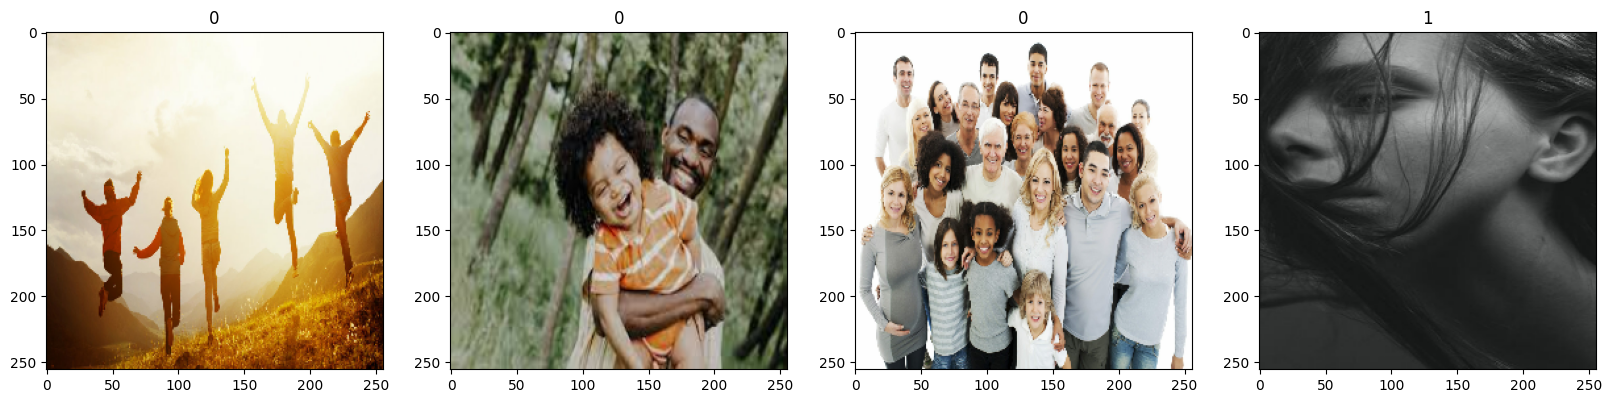

In [103]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #taking 4 images from our batch of (images,labels)
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [104]:
data = data.map(lambda x,y: (x/255, y)) #normalizing as we go through data pipeline
#inside data pipeline we have function called map that allows us to apply specific transformations 
#as our data is being pre-processed in the pipeline


In [105]:
data.as_numpy_iterator().next()

2023-05-19 16:01:16.688161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-05-19 16:01:16.689327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]


(array([[[[7.6078433e-01, 7.6862746e-01, 5.8431375e-01],
          [7.6110601e-01, 7.6894915e-01, 5.8463544e-01],
          [7.6470590e-01, 7.7254903e-01, 5.8823532e-01],
          ...,
          [6.4759499e-01, 6.6328126e-01, 5.2602637e-01],
          [6.4345896e-01, 6.5914524e-01, 5.2189034e-01],
          [6.3932294e-01, 6.5500921e-01, 5.1775432e-01]],
 
         [[7.5851214e-01, 7.6635528e-01, 5.8204156e-01],
          [7.6091439e-01, 7.6875752e-01, 5.8444381e-01],
          [7.6268923e-01, 7.7053237e-01, 5.8621860e-01],
          ...,
          [6.4759499e-01, 6.6328126e-01, 5.2602637e-01],
          [6.4345896e-01, 6.5914524e-01, 5.2189034e-01],
          [6.3932294e-01, 6.5500921e-01, 5.1775432e-01]],
 
         [[7.5693500e-01, 7.6477820e-01, 5.8046442e-01],
          [7.5961018e-01, 7.6745331e-01, 5.8313960e-01],
          [7.6132047e-01, 7.6916361e-01, 5.8484989e-01],
          ...,
          [6.4759499e-01, 6.6328126e-01, 5.2602637e-01],
          [6.4463311e-01, 6.6031939e-

# 5. Split Data

In [106]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [107]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [108]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [110]:
model = Sequential()

In [111]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [114]:
logdir='logs'

In [115]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [116]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-19 16:01:19.828128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-05-19 16:01:19.828434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.5312

2023-05-19 16:01:27.142280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-05-19 16:01:27.142580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - 10s 944ms/step - loss: 1.0186 - accuracy: 0.5312 - val_loss: 0.5868 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 8s 941ms/step - loss: 0.6482 - accuracy: 0.5938 - val_loss: 0.6168 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 8s 921ms/step - loss: 0.5647 - accuracy: 0.7143 - val_loss: 0.5568 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 8s 941ms/step - loss: 0.5141 - accuracy: 0.7366 - val_loss: 0.4355 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.4126 - accuracy: 0.8795 - val_loss: 0.4421 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.3779 - accuracy: 0.8438 - val_loss: 0.2946 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 8s 961ms/step - loss: 0.2632 - accuracy: 0.9241 - val_loss: 0.2625 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

# 8. Plot Performance

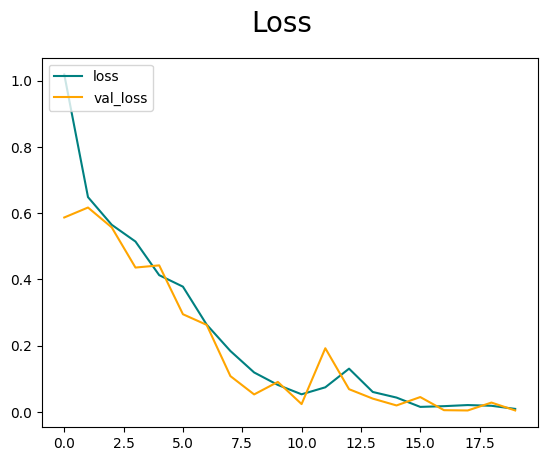

In [117]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

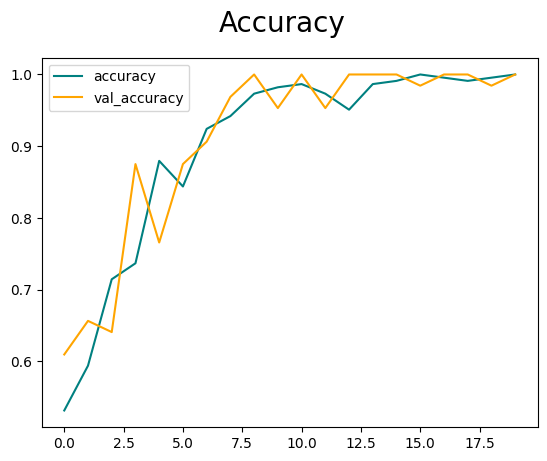

In [118]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [119]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [120]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [121]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-19 16:04:12.991807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-05-19 16:04:12.992613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [305]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 200ms/step


In [122]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [128]:
import cv2

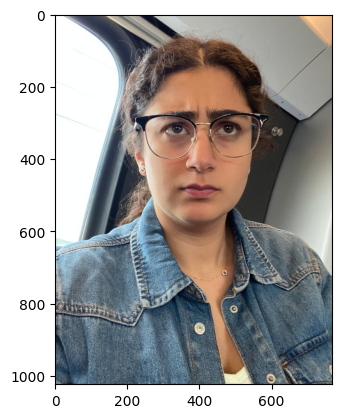

In [158]:
img = cv2.cvtColor(cv2.imread('LayanaSad.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

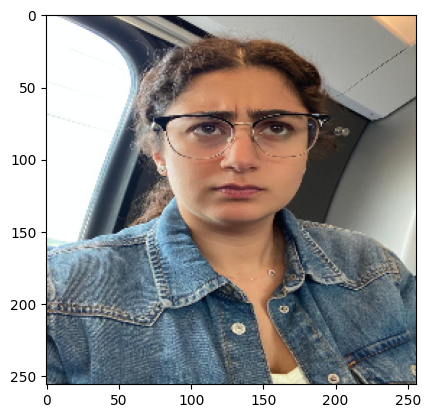

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [161]:
yhat

array([[0.9941703]], dtype=float32)

In [163]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','imageclassifier.h5'))

In [58]:
new_model = load_model('models/imageclassifier.h5')

In [59]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 117ms/step


array([[0.9762881]], dtype=float32)